In [20]:
# Import the necessary libraries into the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset
marketing = pd.read_csv('marketing.csv')

### Examining the data

In [11]:
print(marketing.head(5))

      user_id date_served marketing_channel          variant converted  \
0  a100000029      1/1/18         House Ads  personalization      True   
1  a100000030      1/1/18         House Ads  personalization      True   
2  a100000031      1/1/18         House Ads  personalization      True   
3  a100000032      1/1/18         House Ads  personalization      True   
4  a100000033      1/1/18         House Ads  personalization      True   

  language_displayed language_preferred    age_group date_subscribed  \
0            English            English   0-18 years          1/1/18   
1            English            English  19-24 years          1/1/18   
2            English            English  24-30 years          1/1/18   
3            English            English  30-36 years          1/1/18   
4            English            English  36-45 years          1/1/18   

  date_canceled subscribing_channel is_retained  
0           NaN           House Ads        True  
1           NaN       

In [12]:
print(marketing.describe())

           user_id date_served marketing_channel  variant converted  \
count        10037       10021             10022    10037     10022   
unique        7309          31                 5        2         2   
top     a100000882     1/15/18         House Ads  control     False   
freq            12         789              4733     5091      8946   

       language_displayed language_preferred    age_group date_subscribed  \
count               10037              10037        10037            1856   
unique                  4                  4            7              31   
top               English            English  19-24 years         1/16/18   
freq                 9793               9275         1682             163   

       date_canceled subscribing_channel is_retained  
count            577                1856        1856  
unique           115                   5           2  
top           4/2/18           Instagram        True  
freq              15                 6

In [13]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
user_id                10037 non-null object
date_served            10021 non-null object
marketing_channel      10022 non-null object
variant                10037 non-null object
converted              10022 non-null object
language_displayed     10037 non-null object
language_preferred     10037 non-null object
age_group              10037 non-null object
date_subscribed        1856 non-null object
date_canceled          577 non-null object
subscribing_channel    1856 non-null object
is_retained            1856 non-null object
dtypes: object(12)
memory usage: 941.0+ KB
None


#### Updating the data type of a column

In [14]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

object


In [15]:
# Convert is_retained to boolean
print(marketing['is_retained'].astype('bool').head(5))

0    True
1    True
2    True
3    True
4    True
Name: is_retained, dtype: bool


By changing the data type to boolean, we can now sum the is_retained column to calculate the number of users who were retained.

#### Adding new columns

In [17]:
# Mapping for channels
channel_dict = {'House Ads':1, 'Instagram':2, 'Facebook':3, 'Email':4, 'Push':5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

# Add the new column is_correct_lang
np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

#### Date columns

Currently, the date columns in the marketing DataFrame are being incorrectly read as objects. We need to convert these columns to date columns to be able to use Python and pandas' robust date manipulation and formatting capabilities.

In [18]:
# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', parse_dates=['date_served', 'date_subscribed', 'date_canceled'])

# Add a Day of the Week column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

### Exploratory data analysis

We'll determine how many users are seeing the marketing assets each day. This is crucial to understand how effective our marketing efforts have been over the past month. 

#### Daily marketing reach by channel

In [19]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


#### Visualizing daily marketing reach

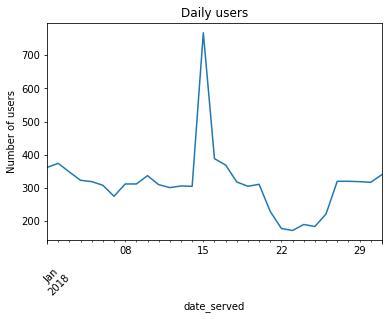

In [21]:
# Plot daily_subscriber
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation = 45)

# Display the plot
plt.show()